Social Network Analysis by Python:
In this python project notebook, We will visualize and understand a social network in Python using Networks.For our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list.

1. Creating a network using NetworkX

In [ ]:
pip install networkx

2. Symmetric Networks

In [111]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

3. visualize the network

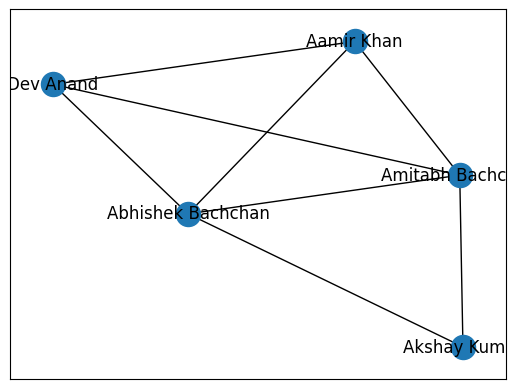

In [112]:
nx.draw_networkx(G_symmetric)

4. Asymmetric Networks

In [113]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

In [127]:
nx.spring_layout(G_asymmetric)


{'A': array([0.02307784, 0.16386315]),
 'B': array([-0.06784132,  1.        ]),
 'D': array([ 0.10722509, -0.65992114]),
 'C': array([-0.01487202,  0.32141524]),
 'E': array([-0.04758959, -0.82535725])}

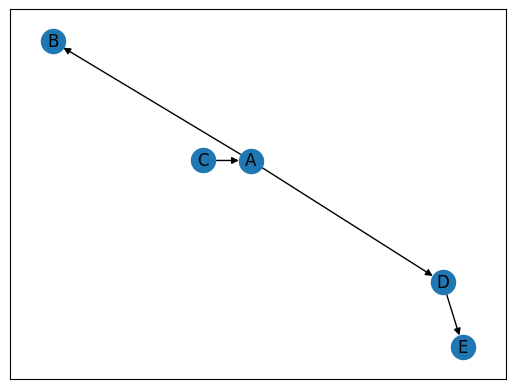

In [126]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

you can see the network with and without using the layout command. The one made using the layout command has more clarity.

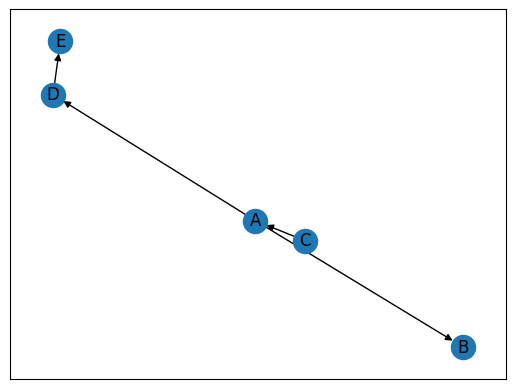

In [115]:
nx.draw_networkx(G_asymmetric)

5. Weighted Networks:

if in our initial network we consider the number of movies done together as a weight, we will get a Weighted Network. Let us make one again of the actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.

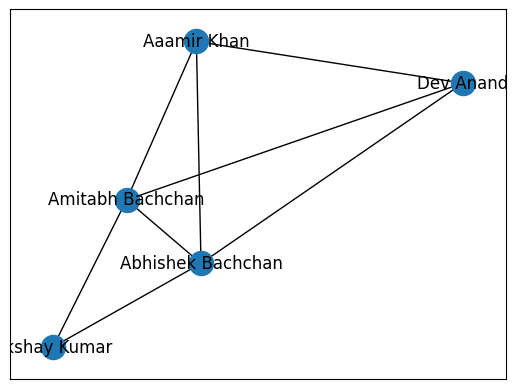

In [132]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)
nx.draw_networkx(G_weighted)

The figure above shows the weighted network of actors in a circular layout. The edge width specifies the weight between two nodes.



6. Multigraph

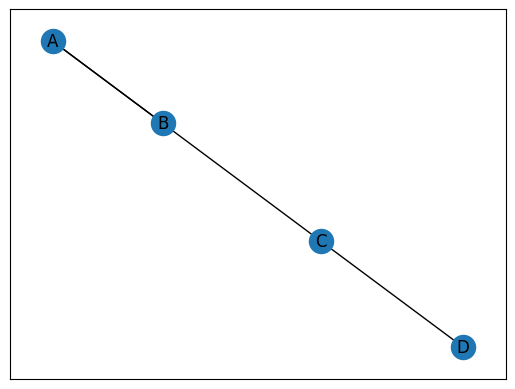

In [135]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')
nx.draw_networkx(G)

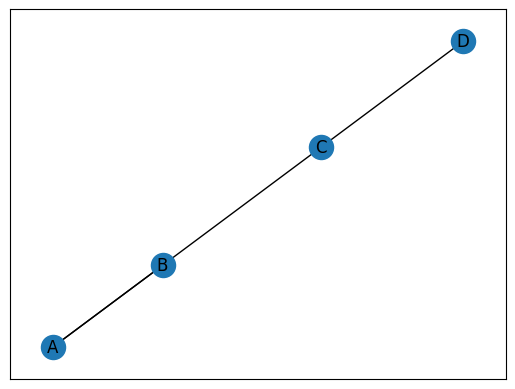

In [136]:
nx.draw_networkx(G)

7. Network Connectivity:

Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [137]:
nx.degree(G_symmetric,'Dev Anand')

3

This will return a value of 3, as Dev Anand has worked with only three actors in the network.



8.Clustering Coefficient:

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric Actor-network is 0.867. We can obtain it using:


In [119]:
nx.average_clustering(G_symmetric)

0.8666666666666666

9. Distance:

We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.

In [154]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [155]:
shortest_path = nx.Graph(G_symmetric)

In [156]:
T = nx.bfs_tree(G_symmetric, 'Dev Anand')

10. Combining :

for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list.

In [157]:
G_fb = nx.read_edgelist("/content/facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)


We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality.

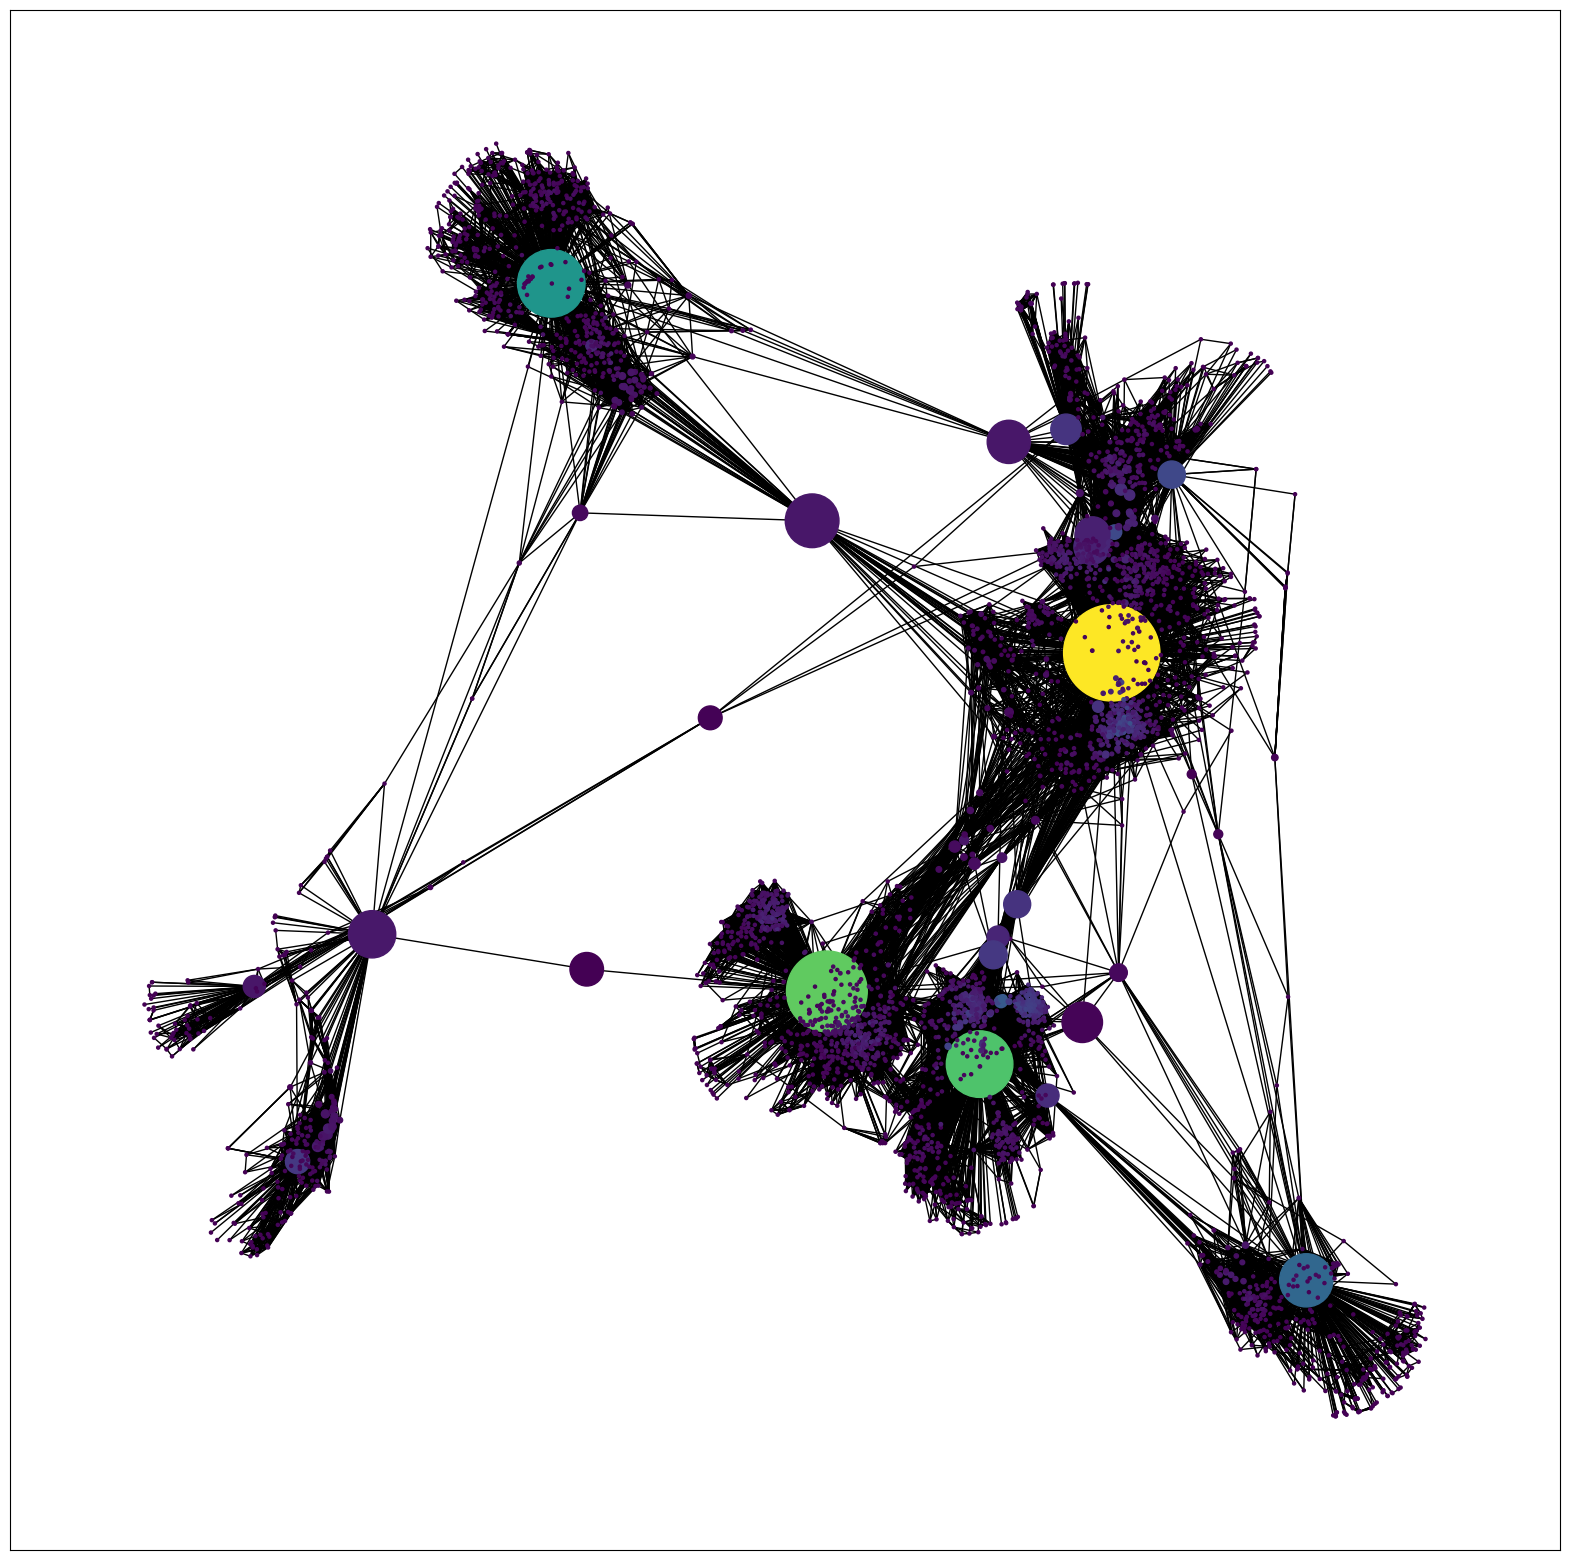

In [160]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )


In [ ]:
plt.axis('off')

(-0.7549634072184563,
 1.1667612287402154,
 -0.8058773788809777,
 1.0224165830016136)

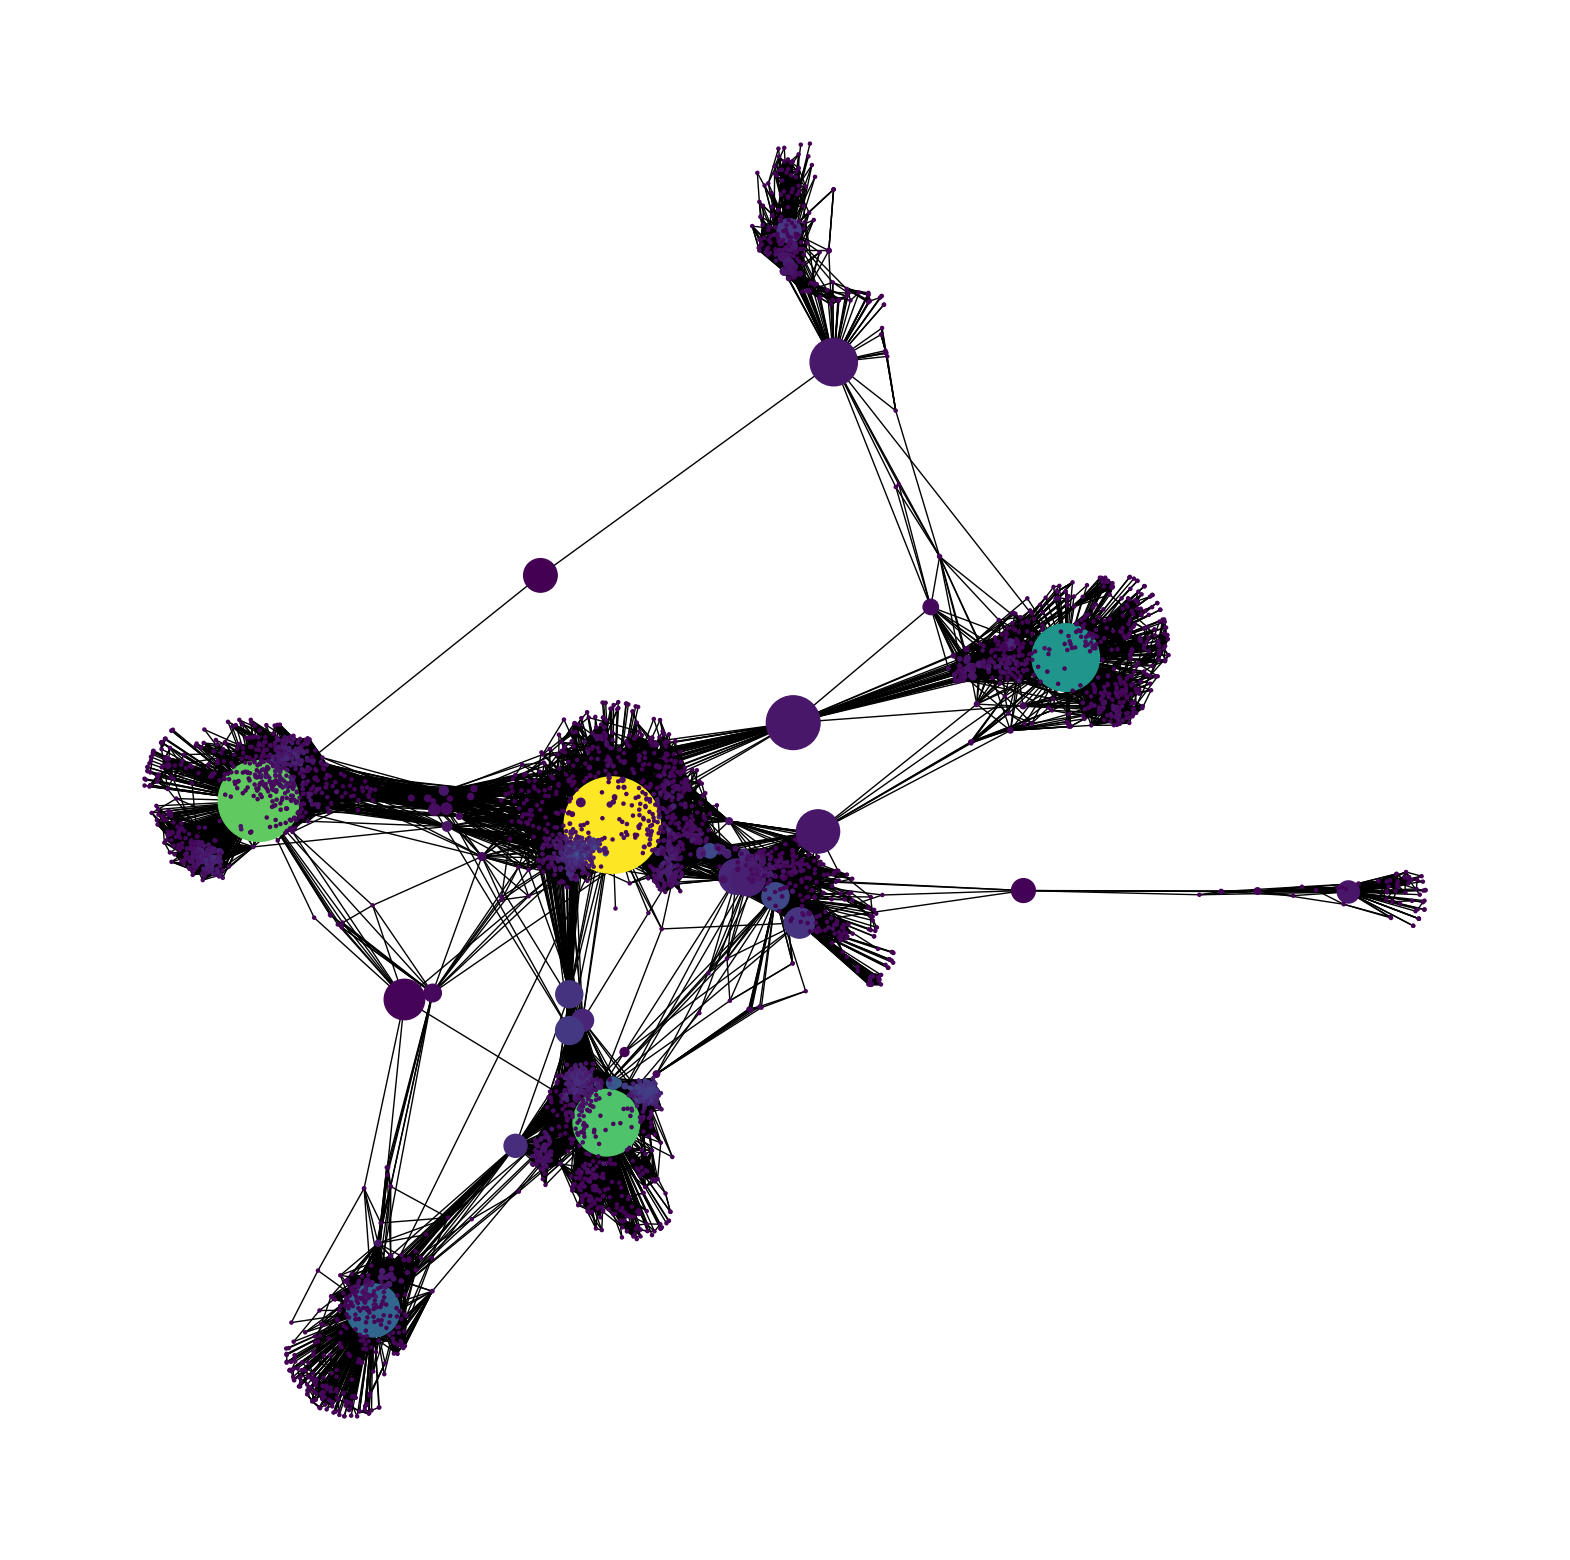

In [163]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

You can also know the labels of the nodes with the highest betweenness centrality using:

In [123]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

Conclusions:

We can see that some nodes are common between Degree Centrality, which is a measure of degree, and Betweenness Centrality which controls the information flow. It is natural that nodes that are more connected also lie on shortest paths between other nodes. The node 1912 is an important node as it is crucial according to all three centrality measures that we had considered.



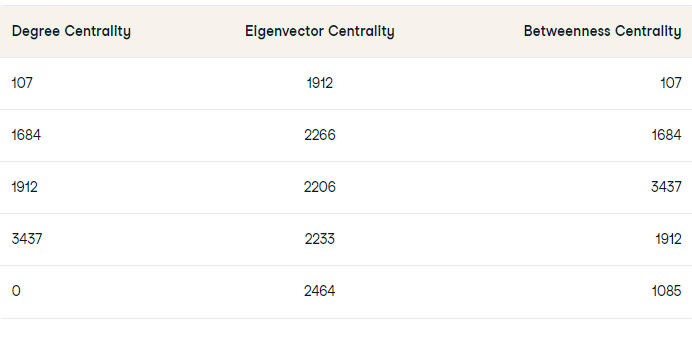